# Pair programming supervised learning
We're going to work on a kaggle competition, and submit an entry to it.  We'll do this via pair programming, so only one person should be typing at a time, the other should be looking for errors and helping to guide the direction.  In industry settings, there is one computer shared by two people, and both of their keyboards and mice are plugged into it, so only one person can type at a time.

People sometimes use the [pomodoro](https://en.wikipedia.org/wiki/Pomodoro_Technique) technique to split up times between people.  Here, I'll tell you when to switch people.

Your options are to share one computer and run things in this jupyter notebook, or use atom-pair to sync your local .py files you're editing in Atom.  Then I would copy-paste the code from atom into an IPython terminal if using the Atom/.py/atom-pair option.

# part 1, person #1 coding: 15 min

## Download the train.json.zip and test.json.zip files from [here](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data).  Read through the problem description on the site to gain some context about the problem.

The first thing we need to do is load the data.  Import pandas (`import pandas as pd`) and use the [.read_json()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) method to read in the two files.
Make sure the files have been unzipped first.

Once you've loaded the files into dataframes, inspect the train file with .head() and .info()

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
# this next line will make plots show up without calling the plt.show() function
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
train = pd.read_json(r"C:\Users\Ryan Allen\Documents\Regis\Work\Data\train.json")

In [5]:
test = pd.read_json(r"C:\Users\Ryan Allen\Documents\Regis\Work\Data\test.json")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


# Part 2, person #1 coding: 15 mins

# EDA and planning feature engineering
An important part of data science is figuring out what data to use, which to ignore, and what kind of features we can extract from the dataset.  Discuss with your programming partner which data columns you think we should use, which we should throw out, and which we should extract new features from (and which we should clean up).  Feel free to do some EDA here to help guide your decisions.

One example to get you started: look at the first description with

`train['description'].iloc[0]`

In [8]:
import seaborn as sns

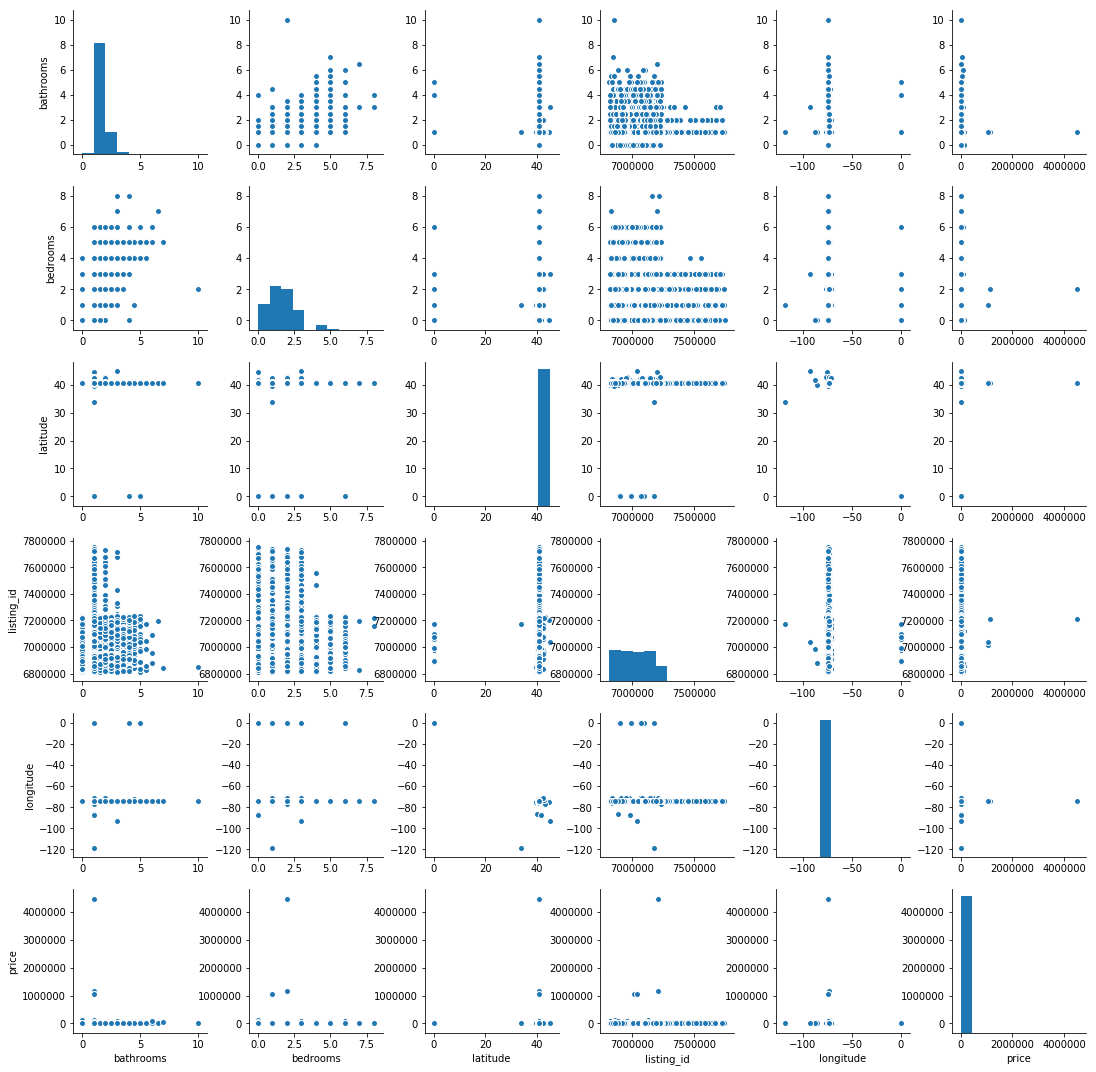

In [9]:
sns.pairplot(train)

In [10]:

del train['longitude']
del train['manager_id']

In [87]:
del test['longitude']
del test['latitude']
del test['manager_id']

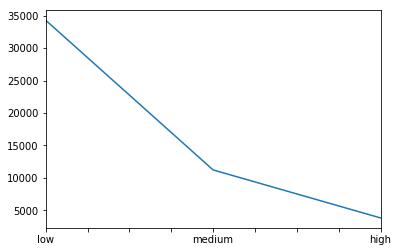

In [11]:
train.interest_level.value_counts().plot()

In [12]:
df_high = train[train.interest_level=='high']

In [13]:
df_medium = train[train.interest_level=='medium']
df_low = train[train.interest_level=='low']

In [14]:
df_medium.describe()

,bathrooms,bedrooms,latitude,listing_id,price
count,11229.000000,11229.000000,11229.000000,1.122900e+04,11229.000000
mean,1.163906,1.622050,40.745567,7.019098e+06,3158.767388
std,0.388318,1.122604,0.388466,1.204286e+05,1243.693856
min,0.000000,0.000000,0.000000,6.811965e+06,695.000000
25%,1.000000,1.000000,40.726500,6.917736e+06,2300.000000
50%,1.000000,2.000000,40.748800,7.013292e+06,2895.000000
75%,1.000000,2.000000,40.772400,7.120692e+06,3650.000000
max,4.000000,7.000000,44.603800,7.316270e+06,15000.000000


In [15]:
df_low.describe()

,bathrooms,bedrooms,latitude,listing_id,price
count,34284.000000,34284.000000,34284.000000,3.428400e+04,3.428400e+04
mean,1.238741,1.514759,40.739504,7.026373e+06,4.176599e+03
std,0.544946,1.111595,0.732933,1.286702e+05,2.644932e+04
min,0.000000,0.000000,0.000000,6.812000e+06,4.300000e+01
25%,1.000000,1.000000,40.729700,6.915616e+06,2.625000e+03
50%,1.000000,1.000000,40.753800,7.024338e+06,3.300000e+03
75%,1.000000,2.000000,40.774725,7.132388e+06,4.400000e+03
max,10.000000,8.000000,44.883500,7.753784e+06,4.490000e+06


In [16]:
df_high.describe()

,bathrooms,bedrooms,latitude,listing_id,price
count,3839.000000,3839.000000,3839.000000,3.839000e+03,3839.000000
mean,1.116176,1.546496,40.748007,7.017844e+06,2700.293045
std,0.341725,1.112187,0.051965,1.206596e+05,2080.554641
min,0.000000,0.000000,40.575800,6.811957e+06,700.000000
25%,1.000000,1.000000,40.721900,6.913970e+06,1850.000000
50%,1.000000,2.000000,40.746500,7.014203e+06,2400.000000
75%,1.000000,2.000000,40.773800,7.119334e+06,3163.000000
max,4.000000,5.000000,41.086800,7.316287e+06,111111.000000


# Switch coding and navigating jobs!
# Part 3, person #2 coding: 15 mins

# Feature engineering - dates
You can use whatever features you want, but we'll go with some standardized ones here.  First, note that the 'created' column looks like dates, but are strings.  So we'll convert that to a date first:

First let's try converting the 'created' column to actual datetimes, instead of strings.  Use the [.to_datetime()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function.  Then use .unique(), and/or .value_counts(), and/or .hist() (histogram), to examine the distributions of years, months, and days in the dates of the data.  Use [.dt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html) to access the datetime variables like year, month, and day, etc. There's a [dayofweek](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.dayofweek.html) as well.

Make new columns in the training dataframe for day, month, and dayofweek. Why not year?

In [17]:
# here are some examples to get you started
date_string_list = ['2016-08-12', '2016-08-13', '2016-08-14']
datetime_index = pd.to_datetime(date_string_list)
datetime_index

DatetimeIndex(['2016-08-12', '2016-08-13', '2016-08-14'], dtype='datetime64[ns]', freq=None)

In [18]:
test_df = pd.DataFrame({'dates':datetime_index})
test_df.head()

,dates
0,2016-08-12
1,2016-08-13
2,2016-08-14


In [19]:
test_df['dates'].dt.day

0    12
1    13
2    14
Name: dates, dtype: int64

In [20]:
test_df['day'] = test_df['dates'].dt.day
test_df.head()

,dates,day
0,2016-08-12,12
1,2016-08-13,13
2,2016-08-14,14


In [21]:
train.created.head()

10        2016-06-24 07:54:24
10000     2016-06-12 12:19:27
100004    2016-04-17 03:26:41
100007    2016-04-18 02:22:02
100013    2016-04-28 01:32:41
Name: created, dtype: object

In [22]:
for index, row in train.iterrows():
    var = row[3][:10]
    train.set_value(index,"created",var)

In [88]:
for index, row in test.iterrows():
    var = row[3][:10]
    test.set_value(index,'created',var)

In [89]:
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,listing_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",7142618,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",7210040,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",7103890,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",7143442,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",6860601,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


In [23]:
train.created.head()

10        2016-06-24
10000     2016-06-12
100004    2016-04-17
100007    2016-04-18
100013    2016-04-28
Name: created, dtype: object

In [24]:
train.created = pd.to_datetime(train.created)

In [90]:
test.created = pd.to_datetime(test.created)

In [25]:
train['day'] = train.created.dt.day
train['month'] = train.created.dt.month
train['dayofweek']= train.created.dt.dayofweek
train['year']=train.created.dt.year

In [91]:
test['day'] = test.created.dt.day
test['month'] = test.created.dt.month
test['dayofweek']= test.created.dt.dayofweek
test['year']=test.created.dt.year

In [92]:
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,listing_id,photos,price,street_address,day,month,dayofweek,year
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",7142618,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,11,6,5,2016
1,1.0,2,0,2016-06-24,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",7210040,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,24,6,4,2016
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",7103890,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street,3,6,4,2016
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",7143442,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r,11,6,5,2016
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",6860601,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street,12,4,1,2016


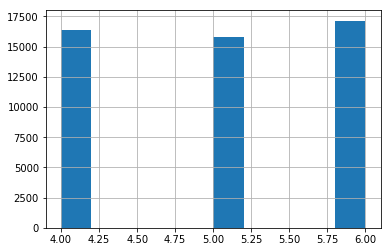

In [27]:
train.month.hist()

# Part 4, person #2 coding: 15 mins

# Create some features for the number of photos, number of features, and number of words in the description.

I would use the ['len'](https://docs.python.org/2/library/functions.html#len) function here.

In [28]:
# here are some examples to get you started
example_photo_list1 = ['photo1', 'photo2', 'photo3']
example_photo_list2 = ['photo_21', 'photo_22', 'photo_23']
len(example_photo_list1)

3

In [29]:
example_df = pd.DataFrame({'photos':[example_photo_list1, example_photo_list2]})
example_df

,photos
0,"[photo1, photo2, photo3]"
1,"[photo_21, photo_22, photo_23]"


In [30]:
example_df['num_photos'] = example_df['photos'].apply(len)
example_df

,photos,num_photos
0,"[photo1, photo2, photo3]",3
1,"[photo_21, photo_22, photo_23]",3


In [31]:
train['num_of_photos'] = train.photos.apply(len)

In [93]:
test['num_of_photos'] = test.photos.apply(len)

In [32]:
train.num_of_photos = train.num_of_photos.astype(float)

In [94]:
test.num_of_photos = test.num_of_photos.astype(float)

In [52]:
train.num_of_photos.describe()

count    49352.000000
mean         5.606946
std          3.632283
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         68.000000
Name: num_of_photos, dtype: float64

In [34]:
train.description[:1].str.split().apply(len)

10    93
Name: description, dtype: int64

Now we want to break up the 'description' column into words.  We used this function last week to split up a string into chunks...
First try breaking up one of the descriptions into words.  Look at the first description with `train['description'].iloc[0]`.  Then get the number of words using the `len()` function.

Finally, create the new column in the dataframe with the .apply method.  I wrote the skeleton for the function, and the .apply part, you just need to fill in the function with the parts that actually count the number of words.

In [38]:
def count_words(descrip):
    """
    Takes description as a string and returns a count of the words in it.
    """
    # add your code here to count the words in the description

    count = len(descrip.split())
    
    return count

In [41]:
train['num_description_words'] = train['description'].apply(lambda x: count_words(x))

In [95]:
test['num_description_words'] = test['description'].apply(lambda x: count_words(x))

In [42]:
train.num_description_words = train.num_description_words.astype(float)

In [96]:
test.num_description_words = test.num_description_words.astype(float)

In [43]:
train.num_description_words.head()

10        93.0
10000      0.0
100004    92.0
100007    78.0
100013    67.0
Name: num_description_words, dtype: float64

# Switch coding/navigating jobs!
# Part 5, person #1 coding: 15 mins
First, let's get a matrix of our training data like this (if 'training' is our dataframe with the full training data):

```python
feature_list = ['num_photos', 'bathrooms', 'bedrooms'...]
training_data = training[feature_list].values
```

Where the list `feature_list` (`['num_photos', 'bathrooms', 'bedrooms'...]`) is a list containing all the features you want to use to in your training data.

Then we need the training_targets which are the interest levels

```python
training_targets = training[].values
```

Fill in the correct string in the [].

.values converts the pandas dataframe into a numpy array, which we can pass into the sklearn functions we're about to use.

Then see if you can use the [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to fit a model to the training_data and training_targets.  Here are some examples of how to use it:

http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
https://www.kaggle.com/aikinogard/two-sigma-connect-rental-listing-inquiries/random-forest-starter-with-numerical-features

It should be something like 

```python
rf = RandomForestClassifier(n_estimators=200)
rf.fit(features, targets)
```

It will probably take a good amount of time for the classifier to fit the data (10s-1min).

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 19 columns):
bathrooms                49352 non-null float64
bedrooms                 49352 non-null int64
building_id              49352 non-null object
created                  49352 non-null datetime64[ns]
description              49352 non-null object
display_address          49352 non-null object
features                 49352 non-null object
interest_level           49352 non-null object
latitude                 49352 non-null float64
listing_id               49352 non-null int64
photos                   49352 non-null object
price                    49352 non-null int64
street_address           49352 non-null object
day                      49352 non-null int64
month                    49352 non-null int64
dayofweek                49352 non-null int64
year                     49352 non-null int64
num_of_photos            49352 non-null float64
num_description_words    49352 non-null 

In [80]:
feature_list = ['num_of_photos', 'bathrooms', 'bedrooms', 'day', 'month', 'year','num_description_words', 'price']
training_data = train[feature_list].values

In [61]:
feature_list

['num_of_photos',
 'bathrooms',
 'bedrooms',
 'created',
 'num_description_words',
 'price']

float

In [63]:
training_targets = train['interest_level'].values

array(['medium', 'low', 'high', ..., 'low', 'low', 'low'], dtype=object)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(n_estimators=200)

In [81]:
rf.fit(training_data, training_targets)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Last part: Part 6, person #2 coding: 15 mins
Apply the same feature engineering to the test data as you did to the training data.  Then use the code below to write the submission file and submit on kaggle!  Our score will be quite low, because our feature engineering is pretty minimaly, and we're not using any of the images they provided in the competition.  As you might know from experience, the quality of images can have a large effect on how many people respond to an ad for housing.

In [97]:
# apply the same feature engineering to the test set as you did to the train set
test_data = test[feature_list].values

In [99]:
# 'rf' should be your model you trained above.  if you gave it a different name, change it here  
predictions = rf.predict_proba(test_data)

In [100]:
labels2idx = {label: i for i, label in enumerate(rf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [101]:
sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = predictions[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)

In [102]:
test.head() #7142618

,bathrooms,bedrooms,building_id,created,description,display_address,features,listing_id,photos,price,street_address,day,month,dayofweek,year,num_of_photos,num_description_words
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",7142618,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street,11,6,5,2016,8.0,76.0
1,1.0,2,0,2016-06-24,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",7210040,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street,24,6,4,2016,3.0,34.0
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",7103890,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street,3,6,4,2016,6.0,157.0
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",7143442,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r,11,6,5,2016,6.0,202.0
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",6860601,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street,12,4,1,2016,7.0,172.0
